In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import dtale
from datetime import date
%matplotlib inline

In [3]:
customer = pd.read_csv('QVI_purchase_behaviour.csv')

In [4]:
transaction = pd.read_excel('QVI_transaction_data.xlsx')

# Task 1

- Creating and interpreting high level summaries of the data
- Finding outliers and removing these 
- Checking data formats and correcting 

## understand the data

In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [8]:
transaction.sample(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
141792,43382,110,110232,112974,111,Smiths Chip Thinly Cut Original 175g,2,6.0
95771,43374,217,217183,217134,40,Thins Chips Seasonedchicken 175g,2,6.6
85755,43547,70,70008,67529,102,Kettle Mozzarella Basil & Pesto 175g,2,10.8
55571,43329,196,196175,196516,61,Smiths Crinkle Cut Chips Chicken 170g,1,2.9
57911,43590,51,51454,47140,49,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6


In [17]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [44]:
customer.sample(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
2713,9120,OLDER SINGLES/COUPLES,Budget
40606,152053,OLDER SINGLES/COUPLES,Budget
29912,110070,MIDAGE SINGLES/COUPLES,Budget
2871,9335,OLDER SINGLES/COUPLES,Premium
54624,205092,OLDER SINGLES/COUPLES,Mainstream


change transaction date to Datetime format , date start at 1899-12-30 same as excel and spreadsheet

In [9]:
transaction['DATE'] =pd.to_datetime(transaction['DATE'], unit='D', origin=pd.Timestamp('1899-12-30'))

In [10]:
transaction['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [75]:
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('&','')
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('/','')

In [76]:
transaction[['PROD_NAME']].sample(10)

,PROD_NAME
176833,Doritos Mexicana 170g
86177,Doritos Corn Chips Original 170g
201026,Smiths Crinkle Chips Salt Vinegar 330g
41382,Kettle 135g Swt Pot Sea Salt
188916,Smith Crinkle Cut Mac N Cheese 150g
204513,Smiths Crinkle Chips Salt Vinegar 330g
236768,Kettle Sensations Siracha Lime 150g
39883,Tyrrells Crisps Lightly Salted 165g
169394,Kettle Mozzarella Basil Pesto 175g
186226,RRD SR Slow Rst Pork Belly 150g


In [78]:
from collections import Counter

transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('&','')
transaction['PROD_NAME'] = transaction['PROD_NAME'].str.replace('/','')

productlist = transaction['PROD_NAME'].str.split(' ').to_list()
flat_list = list(np.concatenate(productlist).flat)
Counter(flat_list).keys()

dict_keys(['Natural', 'Chip', '', 'Compny', 'SeaSalt175g', 'CCs', 'Nacho', 'Cheese', '175g', 'Smiths', 'Crinkle', 'Cut', 'Chips', 'Chicken', '170g', 'Thinly', 'SCreamOnion', 'Kettle', 'Tortilla', 'ChpsHnyJlpno', 'Chili', '150g', 'Old', 'El', 'Paso', 'Salsa', 'Dip', 'Tomato', 'Mild', '300g', 'Salt', 'Vinegar', '330g', 'Grain', 'Waves', 'Sweet', 'Chilli', '210g', 'Doritos', 'Corn', 'Mexican', 'Jalapeno', 'Sour', 'CreamChives', '210G', 'Sensations', 'Siracha', 'Lime', 'Twisties', '270g', 'WW', 'Thins', 'Light', 'Tangy', 'Original', 'Burger', 'Rings', '220g', 'NCC', 'Cream', 'Garden', 'Chives', 'Southern', 'Cheezels', 'Box', '125g', 'Infzns', 'Crn', 'Crnchers', 'Gcamole', '110g', 'Sea', 'And', 'Red', 'Rock', 'Deli', 'Thai', 'ChilliLime', 'Pringles', 'Sthrn', 'FriedChicken', '134g', 'SweetSpcy', 'BBQ', 'SR', 'Mzzrlla', 'Originl', 'saltd', 'Sp', 'Truffle', '150G', 'Swt', 'ChliSCream175G', 'Mexicana', 'French', 'OnionDip', 'ChipCo', 'Hony', 'Soy', 'Chckn175g', 'Dorito', 'Chp', 'Supreme', '380

In [91]:
chips_transaction = transaction[~transaction['PROD_NAME'].str.contains("Old")]

In [95]:
chips_transaction[['PROD_QTY', 'TOT_SALES']].describe().T

,count,mean,std,min,25%,50%,75%,max
PROD_QTY,255512.0,1.907225,0.652135,1.0,2.0,2.0,2.0,200.0
TOT_SALES,255512.0,7.215434,3.085918,1.5,5.4,7.4,8.8,650.0


In [99]:
chips_transaction[['PROD_QTY', 'TOT_SALES']].sort_values('TOT_SALES', ascending= False)

,PROD_QTY,TOT_SALES
69762,200,650.0
69763,200,650.0
171815,5,29.5
69496,5,29.5
184969,5,29.5
...,...,...
23456,1,1.5
151264,1,1.5
30322,1,1.5
64899,1,1.5


In [103]:
chips_transaction = chips_transaction[chips_transaction['PROD_QTY'] < 199]
chips_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [110]:
totalsalebydate = chips_transaction.sort_values('DATE').groupby('DATE')[['PROD_QTY', 'TOT_SALES']].sum()
totalsalebydate

,PROD_QTY,TOT_SALES
DATE,,
2018-07-01,1332,5056.0
2018-07-02,1304,4994.1
2018-07-03,1336,5051.5
2018-07-04,1324,5060.0
2018-07-05,1293,4749.4
...,...,...
2019-06-26,1313,4963.3
2019-06-27,1317,5024.3
2019-06-28,1343,5008.9


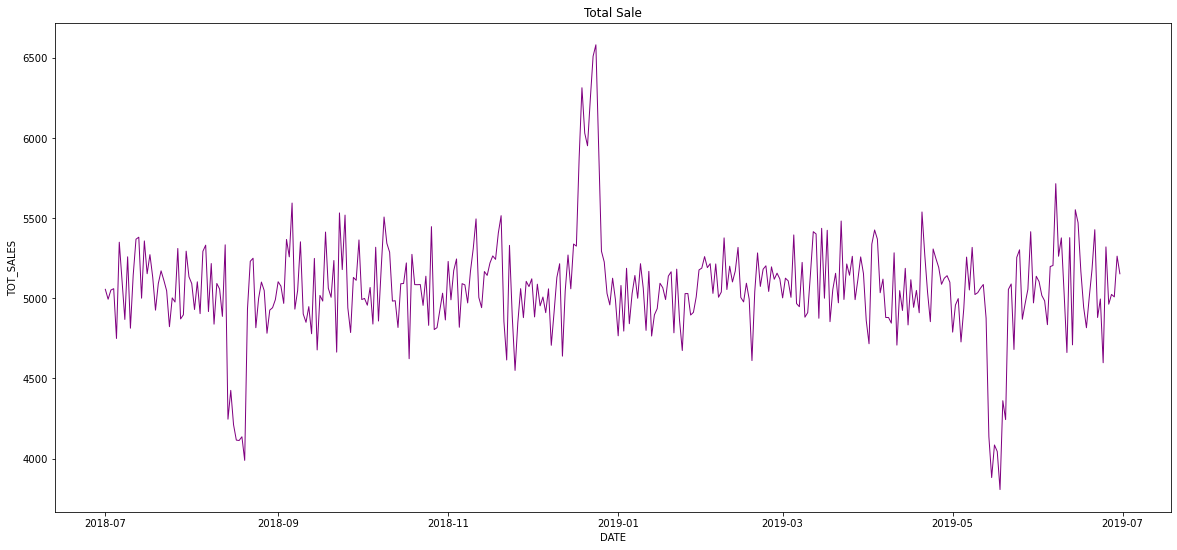

In [129]:
totalsalebydate = chips_transaction.sort_values('DATE').groupby('DATE')[['PROD_QTY', 'TOT_SALES']].sum()
plt.figure(figsize=(20,9))
sns_plot = sns.lineplot(x = 'DATE', y = 'TOT_SALES',data = totalsalebydate, linewidth=1, color='purple').set(title='Total Sale')


In [141]:
totalsalebydate.describe().T

,count,mean,std,min,25%,50%,75%,max
PROD_QTY,364.0,1337.689560,81.033917,1019.0,1304.0,1335.00,1376.000,1751.0
TOT_SALES,364.0,5061.345879,315.477768,3807.0,4926.4,5059.65,5214.725,6581.3


C:\Users\WINDOWS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



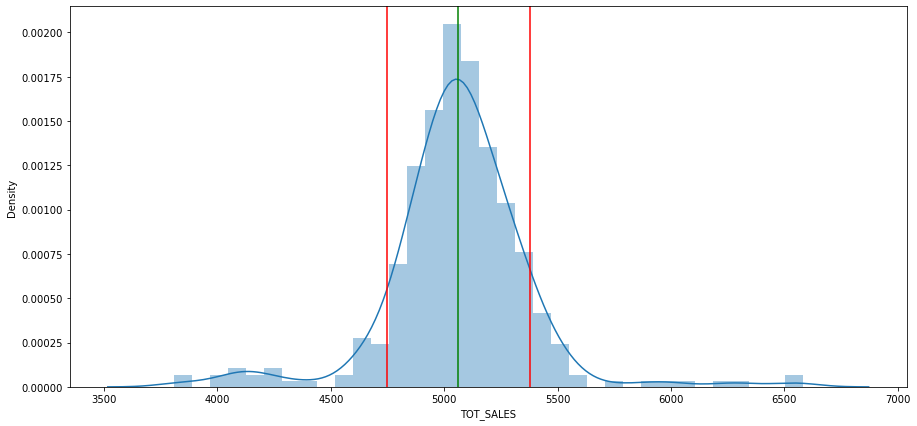

In [158]:
# normal distribution 
plt.figure(figsize=(15,7))
sns.distplot(totalsalebydate['TOT_SALES'])
plt.axvline(totalsalebydate['TOT_SALES'].mean(),color='g')
plt.axvline(totalsalebydate['TOT_SALES'].mean()-totalsalebydate['TOT_SALES'].std(),color='r')
plt.axvline(totalsalebydate['TOT_SALES'].mean()+totalsalebydate['TOT_SALES'].std(),color='r')

In [162]:
totalsalebydate['TOT_SALES'].mean()-totalsalebydate['TOT_SALES'].std()

4745.868110768546

In [161]:
totalsalebydate['TOT_SALES'].mean()+totalsalebydate['TOT_SALES'].std()

5376.823647473217

In [257]:
chips_transaction['size'] = chips_transaction['PROD_NAME'].str.extract('([0-9]+[gG])')
chips_transaction['size'].str.replace('G','g')
chips_transaction['size'] = chips_transaction['size'].astype('category')
chips_transaction

<ipython-input-257-a99875871a96>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-257-a99875871a96>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150g
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g


In [258]:
chips_transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
size              0
dtype: int64

In [259]:
chips_transaction['size'].value_counts().head()

175g    64929
150g    41633
134g    25102
110g    22387
170g    19983
Name: size, dtype: int64

In [263]:
chips_transaction.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size
251951,2019-02-14,180,180225,182477,74,Tostitos Splash Of Lime 175g,2,8.8,175g
108141,2019-01-30,119,119313,123351,51,Doritos Mexicana 170g,2,8.8,170g
206984,2018-11-05,63,63146,60310,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110g
217850,2018-09-05,15,15232,14106,63,Kettle 135g Swt Pot Sea Salt,2,8.4,135g
234256,2019-02-17,165,165353,167043,51,Doritos Mexicana 170g,2,8.8,170g
50082,2018-10-16,208,208058,206437,102,Kettle Mozzarella Basil Pesto 175g,2,10.8,175g
213177,2019-04-05,186,186030,188438,8,Smiths Crinkle Cut Chips Original 170g,2,5.8,170g
216294,2019-04-04,261,261087,260091,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165g
106798,2018-11-24,103,103017,103078,51,Doritos Mexicana 170g,2,8.8,170g
38160,2019-04-16,69,69087,66380,92,WW Crinkle Cut Chicken 175g,2,3.4,175g


In [264]:
chips_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255510 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            255510 non-null  datetime64[ns]
 1   STORE_NBR       255510 non-null  int64         
 2   LYLTY_CARD_NBR  255510 non-null  int64         
 3   TXN_ID          255510 non-null  int64         
 4   PROD_NBR        255510 non-null  int64         
 5   PROD_NAME       255510 non-null  object        
 6   PROD_QTY        255510 non-null  int64         
 7   TOT_SALES       255510 non-null  float64       
 8   size            255510 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 17.8+ MB


In [265]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [266]:
df = chips_transaction.merge(customer,how='left',on='LYLTY_CARD_NBR')
df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,175g,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,150g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...
255505,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175g,YOUNG SINGLES/COUPLES,Premium
255506,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175g,YOUNG SINGLES/COUPLES,Premium
255507,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170g,YOUNG SINGLES/COUPLES,Premium
255508,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150g,YOUNG SINGLES/COUPLES,Premium


In [271]:
df.sample(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,LIFESTAGE,PREMIUM_CUSTOMER
9040,2018-07-22,93,93044,90878,36,Kettle Chilli 175g,2,10.8,175g,MIDAGE SINGLES/COUPLES,Mainstream
163966,2018-07-30,244,244488,247371,3,Kettle Sensations Camembert Fig 150g,1,4.6,150g,RETIREES,Mainstream
26629,2018-10-03,227,227006,228315,35,Woolworths Mild Salsa 300g,2,3.0,300g,NEW FAMILIES,Budget
38164,2018-07-23,86,86067,84547,18,Cheetos Chs Bacon Balls 190g,2,6.6,190g,OLDER FAMILIES,Budget
208653,2018-11-19,260,260182,259383,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110g,YOUNG FAMILIES,Mainstream
21008,2018-10-17,157,157067,158817,62,Pringles Mystery Flavour 134g,2,7.4,134g,MIDAGE SINGLES/COUPLES,Premium
231298,2019-02-12,17,17072,14719,51,Doritos Mexicana 170g,2,8.8,170g,YOUNG SINGLES/COUPLES,Mainstream
92252,2018-12-12,216,216041,214849,17,Kettle Sensations BBQMaple 150g,2,9.2,150g,OLDER SINGLES/COUPLES,Budget
91939,2018-08-31,210,210232,209918,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,150g,OLDER SINGLES/COUPLES,Budget
160299,2019-04-20,201,201221,200895,33,Cobs Popd SwtChlli SrCream Chips 110g,2,7.6,110g,RETIREES,Mainstream


In [272]:
pd.crosstab(df.LIFESTAGE,df.PREMIUM_CUSTOMER)

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,4876,11373,7946
NEW FAMILIES,2898,2243,1533
OLDER FAMILIES,22402,13770,10833
OLDER SINGLES/COUPLES,17733,17700,17101
RETIREES,14632,20702,12590
YOUNG FAMILIES,18450,12488,11187
YOUNG SINGLES/COUPLES,8963,19987,6103


In [279]:
pivot1 = pd.pivot_table(data=df,values= 'TOT_SALES', index= 'LIFESTAGE', columns='PREMIUM_CUSTOMER',aggfunc='sum')

In [288]:
pivot1

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,34122.50,85928.25,55836.75
NEW FAMILIES,20898.25,16208.10,10955.60
OLDER FAMILIES,160794.85,98738.25,77129.20
OLDER SINGLES/COUPLES,130190.80,127391.10,125852.45
RETIREES,107644.90,148210.65,92785.75
YOUNG FAMILIES,132710.75,88678.15,80292.30
YOUNG SINGLES/COUPLES,58550.80,149441.20,39969.30


In [303]:
pd.pivot_table(data=df,values= 'TOT_SALES', index= 'LIFESTAGE', columns='PREMIUM_CUSTOMER',aggfunc='sum',margins=True).sort_values('All',ascending=False)[1:]

PREMIUM_CUSTOMER,Budget,Mainstream,Premium,All
LIFESTAGE,,,,
OLDER SINGLES/COUPLES,130190.80,127391.10,125852.45,383434.35
RETIREES,107644.90,148210.65,92785.75,348641.30
OLDER FAMILIES,160794.85,98738.25,77129.20,336662.30
YOUNG FAMILIES,132710.75,88678.15,80292.30,301681.20
YOUNG SINGLES/COUPLES,58550.80,149441.20,39969.30,247961.30
MIDAGE SINGLES/COUPLES,34122.50,85928.25,55836.75,175887.50
NEW FAMILIES,20898.25,16208.10,10955.60,48061.95


<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='LIFESTAGE'>

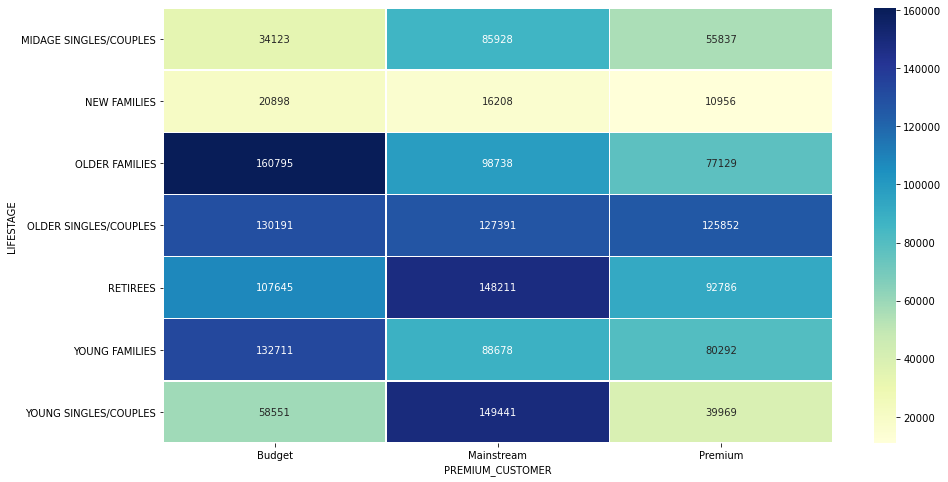

In [296]:
pivot1 = pd.pivot_table(data=df,values= 'TOT_SALES', index= 'LIFESTAGE', columns='PREMIUM_CUSTOMER',aggfunc='sum')
plt.figure(figsize=(15,8))
sns.heatmap(pivot1,annot=True,fmt=".0f",linewidths=.5,cmap="YlGnBu")

In [360]:
stage_agg = df.groupby("LIFESTAGE")["PREMIUM_CUSTOMER"].agg(pd.Series.mode).sort_values()
print("Top contributor per LIFESTAGE by PREMIUM category")
print(stage_agg)

Top contributor per LIFESTAGE by PREMIUM category
LIFESTAGE
NEW FAMILIES                  Budget
OLDER FAMILIES                Budget
OLDER SINGLES/COUPLES         Budget
YOUNG FAMILIES                Budget
MIDAGE SINGLES/COUPLES    Mainstream
RETIREES                  Mainstream
YOUNG SINGLES/COUPLES     Mainstream
Name: PREMIUM_CUSTOMER, dtype: object


In [365]:
unique_cust = df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(unique_cust)

unique_cust.sort_values(ascending=False) 

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          7955
RETIREES                Mainstream          6421
OLDER SINGLES/COUPLES   Mainstream          4894
                        Budget              4892
                        Premium             4715
OLDER FAMILIES          Budget              4641
RETIREES                Budget              4419
YOUNG FAMILIES          Budget              3980
RETIREES                Premium             3835
YOUNG SINGLES/COUPLES   Budget              3735
MIDAGE SINGLES/COUPLES  Mainstream          3308
OLDER FAMILIES          Mainstream          2808
YOUNG FAMILIES          Mainstream          2702
YOUNG SINGLES/COUPLES   Premium             2542
YOUNG FAMILIES          Premium             2422
MIDAGE SINGLES/COUPLES  Premium             2405
OLDER FAMILIES          Premium             2252
MIDAGE SINGLES/COUPLES  Budget              1497
NEW FAMILIES            Budget              1100
                        Main

In [373]:
freq_per_cust = df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"]).count()['DATE'] #จำนวนครั้งที่ซื้อ
freq_per_cust.sort_values(ascending=False).head(10)

LYLTY_CARD_NBR  LIFESTAGE              PREMIUM_CUSTOMER
162039          OLDER FAMILIES         Mainstream          18
116181          YOUNG FAMILIES         Premium             17
172032          YOUNG SINGLES/COUPLES  Mainstream          17
128178          OLDER FAMILIES         Mainstream          17
230078          OLDER FAMILIES         Budget              17
104117          OLDER FAMILIES         Budget              16
23192           OLDER FAMILIES         Budget              16
222242          OLDER FAMILIES         Mainstream          16
179228          YOUNG FAMILIES         Budget              16
213140          OLDER SINGLES/COUPLES  Premium             16
Name: DATE, dtype: int64

In [376]:
freq_per_cust.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(["mean", "count"])\
.head(10).sort_values(ascending=False, by="mean")

mean  count
LIFESTAGE              PREMIUM_CUSTOMER                 
OLDER FAMILIES         Mainstream        4.903846   2808
                       Budget            4.826977   4641
                       Premium           4.810391   2252
OLDER SINGLES/COUPLES  Budget            3.624898   4892
MIDAGE SINGLES/COUPLES Mainstream        3.438029   3308
                       Premium           3.303950   2405
                       Budget            3.257181   1497
NEW FAMILIES           Mainstream        2.670238    840
                       Premium           2.638554    581
                       Budget            2.634545   1100